In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')
pd.set_option('Display.max_rows',None)
pd.set_option('Display.max_columns',None)

import folium
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.shape

(32560, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
for col in ['Workclass', 'Occupation', 'Native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [10]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

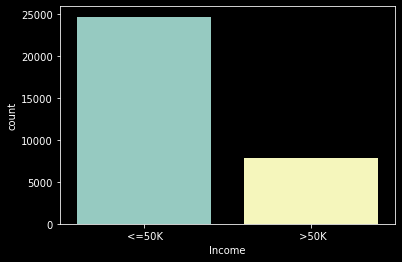

In [11]:
sns.countplot(x='Income', data = df)

<AxesSubplot:xlabel='Income', ylabel='Age'>

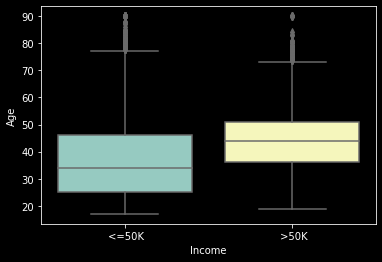

In [12]:
sns.boxplot(y='Age',x='Income',data=df)

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

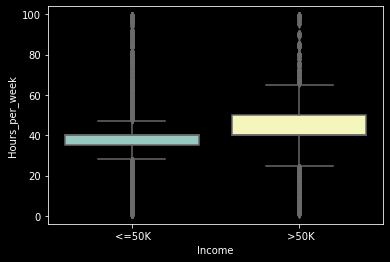

In [13]:
sns.boxplot(y='Hours_per_week',x='Income',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

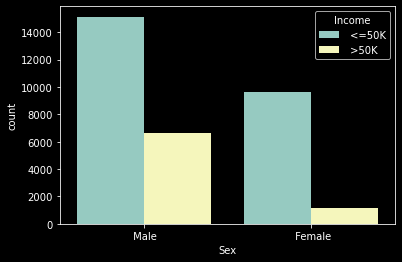

In [14]:
sns.countplot(df['Sex'],hue=df['Income'])

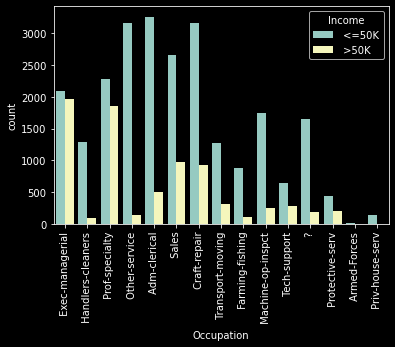

In [15]:
sns.countplot(df['Occupation'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

In [16]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [17]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [20]:
df.dtypes

Age               int64
Workclass         int64
Fnlwgt            int64
Education         int64
Education_num     int64
Marital_status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int64
Income            int64
dtype: object

In [21]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [22]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

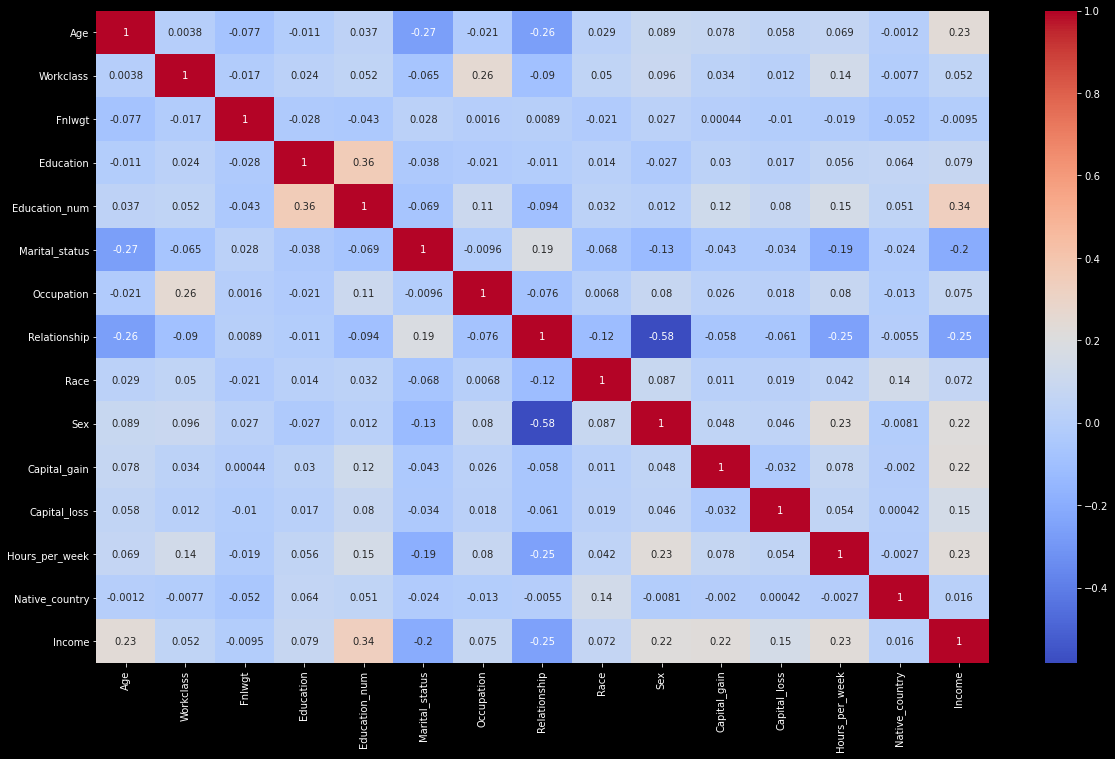

In [23]:
corrmat = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [24]:
corrmat['Income'].sort_values(ascending = False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

In [25]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

In [28]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.477365,0.091930,5.122497,-0.332490,1.145568,0.919585,-0.605687,-0.276188,0.394002,0.701994,-0.145826,-0.218065,-0.037515,0.291727
1,-1.135011,0.091930,-1.102316,0.182397,-0.416092,0.919585,-0.842091,0.972176,-3.129446,0.701994,-0.145826,-0.218065,-3.179565,0.420218
2,-0.404293,-2.644308,-0.251371,0.182397,-0.416092,-1.737427,-1.551302,-0.276188,-3.129446,-1.424514,-0.145826,-0.218065,0.043050,-4.333955
3,1.276358,-1.960248,-0.016530,0.439841,1.535983,-1.737427,-1.314898,1.596358,0.394002,-1.424514,-0.145826,-0.218065,-0.037515,0.291727
4,0.837928,0.091930,-1.377317,-0.075046,2.316813,-0.408921,0.812737,-0.900370,0.394002,0.701994,1.933241,-0.218065,0.768139,0.291727


In [29]:
l=[]

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression:', acc * 100)
l.append(acc)

Logistic Regression: 82.23791973791974


In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('SVM:', acc * 100)
l.append(acc)

SVM: 84.45945945945947


In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Knn:',acc * 100)
l.append(acc)

Knn: 82.31981981981981


In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Decision Tree:', acc * 100)
l.append(acc)

Decision Tree: 81.47010647010647


In [33]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Naive Bayes:', acc * 100)
l.append(acc)

Naive Bayes: 80.87633087633087


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Random Forest:',acc * 100)
l.append(acc)
print(cm(y_test, y_pred))
print(cr(y_test, y_pred))

Random Forest: 85.84152334152334
[[6887  508]
 [ 875 1498]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7395
           1       0.75      0.63      0.68      2373

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.80      9768
weighted avg       0.85      0.86      0.85      9768



Text(0.5, 0, 'Accuracy')

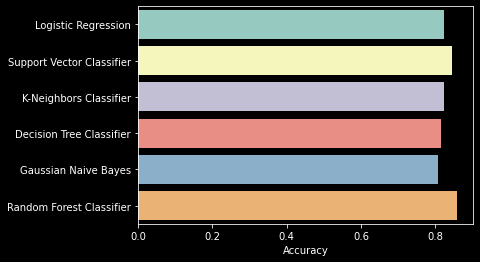

In [35]:
y_axis=['Logistic Regression',
     'Support Vector Classifier',
        'K-Neighbors Classifier',
      'Decision Tree Classifier',
       'Gaussian Naive Bayes',
      'Random Forest Classifier']
x_axis=l
sns.barplot(x=x_axis,y=y_axis)
plt.xlabel('Accuracy')